In [1]:
NICKNAME = "Goshaan4k"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384 * 10 ** (-11)
    F = G * M1 * M2 / r ** 2
    sigma = (G / r ** 2) * ((2 * M1 * M2 * dr / r) ** 2 + (M1 * dM2) ** 2 + (dM1 * M2) ** 2) ** 0.5
    return F, sigma

In [4]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639264)


In [5]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    G = 6.67384 * 10 ** (-11)
    M1_arr = np.random.normal(M1, dM1, (1, n))
    M2_arr = np.random.normal(M2, dM2, (1, n))
    r_arr = np.random.normal(r, dr, (1, n))
    F = G * M1_arr * M2_arr / r_arr ** 2
    return F[0]

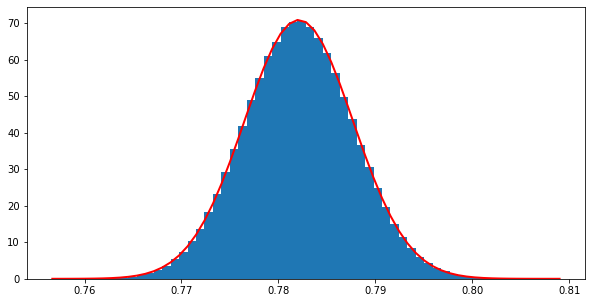

In [6]:
F = MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
F_e, sigma_e = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)

plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(F, 60, density=True)
plt.plot(bins, 1/(sigma_e * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - F_e)**2 / (2 * sigma_e**2) ),
         linewidth=2, color='r')
plt.show()

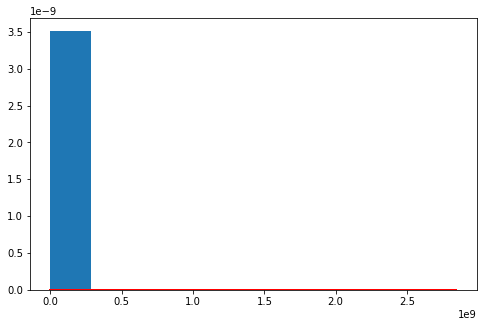

In [7]:
F_2 = MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
F_e_2, sigma_e_2 = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)


plt.figure(figsize=(8, 5))

count, bins, ignored = plt.hist(F_2, 10, density=True)
plt.plot(bins, 1/(sigma_e_2 * np.sqrt(2 * np.pi)) *
               np.exp(- (bins - F_e_2)**2 / (2 * sigma_e_2**2) ),
         linewidth=2, color='r')

plt.show()

In [9]:
#Метод Монте-Карло намного более точен из-за своей специфики (стандартные октлонения одного порядка со случайными величинами), также универсальность метода Монте-Карло - его можно применять к любым величинам, а также учесть не только процессы, но и их взаимосвязь